Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8803 - loss: 0.4290
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9646 - loss: 0.1199
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9763 - loss: 0.0766
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9833 - loss: 0.0542
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9871 - loss: 0.0420
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0943
Test Accuracy: 0.9753000140190125
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


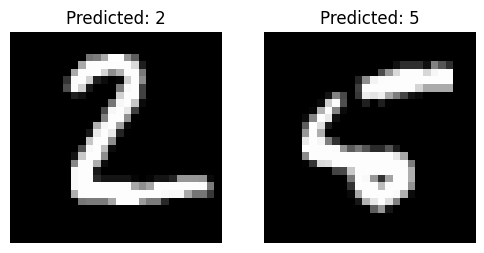

In [3]:
# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Import matplotlib for displaying images
import matplotlib.pyplot as plt

# Load the MNIST handwritten digit dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values from 0–255 to 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build a Sequential Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

# Predict digit classes for test images
predictions = model.predict(x_test)

# Find indices of digits 2 and 5 in test labels
index_2 = list(y_test).index(2)
index_5 = list(y_test).index(5)
indices = [index_2, index_5]

# Display the images with predictions
plt.figure(figsize=(6, 3))
for i, index in enumerate(indices):
    plt.subplot(1, 2, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title("Predicted: " + str(predictions[index].argmax()))
    plt.axis('off')

plt.show()
